In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import classification_report

from sklearn.decomposition import PCA

import seaborn as sn
from sklearn.metrics import confusion_matrix

For train file

In [ ]:
train_data = pd.read_excel('train.xlsx')
print(train_data.shape)
train_data

(15629, 9)


,Unnamed: 0,Time,Label,Ax,Ay,Az,Gx,Gy,Gz
0,0,0.000,STRAIGHT,0.000000,-2.839663,0.000000,0.000000,0.000000,0.000000
1,1,0.025,STRAIGHT,0.000000,-2.247121,0.000000,0.000000,-1.286378,0.000000
2,2,0.050,STRAIGHT,0.000000,-1.246176,0.000000,0.000000,-5.460001,0.000000
3,3,0.075,STRAIGHT,0.000000,1.265712,0.000000,0.000000,-5.168364,0.000000
4,4,0.100,STRAIGHT,0.000000,0.507553,0.000000,0.000000,-3.383925,0.000000
...,...,...,...,...,...,...,...,...,...
15624,15624,3.900,CRASH,1529.706543,-182.618790,980.903320,-12.817182,3.604994,32.331108
15625,15625,3.925,CRASH,-217.366531,156.345444,-92.498322,-86.369942,-18.750452,-7.714307
15626,15626,3.950,CRASH,-322.846558,46.281906,-230.901504,31.651831,33.523930,-21.528996
15627,15627,3.975,CRASH,815.905396,-76.754196,538.488953,-21.189016,7.410552,13.144523


In [ ]:
train_data = train_data.drop(['Unnamed: 0'], axis = 1)
train_data = train_data.drop(['Time'], axis = 1)

In [ ]:
train_data

,Label,Ax,Ay,Az,Gx,Gy,Gz
0,STRAIGHT,0.000000,-2.839663,0.000000,0.000000,0.000000,0.000000
1,STRAIGHT,0.000000,-2.247121,0.000000,0.000000,-1.286378,0.000000
2,STRAIGHT,0.000000,-1.246176,0.000000,0.000000,-5.460001,0.000000
3,STRAIGHT,0.000000,1.265712,0.000000,0.000000,-5.168364,0.000000
4,STRAIGHT,0.000000,0.507553,0.000000,0.000000,-3.383925,0.000000
...,...,...,...,...,...,...,...
15624,CRASH,1529.706543,-182.618790,980.903320,-12.817182,3.604994,32.331108
15625,CRASH,-217.366531,156.345444,-92.498322,-86.369942,-18.750452,-7.714307
15626,CRASH,-322.846558,46.281906,-230.901504,31.651831,33.523930,-21.528996
15627,CRASH,815.905396,-76.754196,538.488953,-21.189016,7.410552,13.144523


In [ ]:
# distributing the dataset into two components X and Y
X = train_data.iloc[:, 1::].values
y = train_data.iloc[:, 0].values

split train data into training and cross-validation

In [ ]:
# splitting the data into training and cross validation data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

For Test file

In [ ]:
test_data = pd.read_excel('test.xlsx')
print(test_data.shape)
test_data

(4106, 9)


,Unnamed: 0,Time,Label,Ax,Ay,Az,Gx,Gy,Gz
0,0,6.325,STRAIGHT,0.000000,0.000012,0.000000,0.000000,-0.001544,0.000000
1,1,6.350,STRAIGHT,0.000000,0.000016,0.000000,0.000000,-0.001543,0.000000
2,2,6.375,STRAIGHT,0.000000,0.000021,0.000000,0.000000,-0.001535,0.000000
3,3,6.400,STRAIGHT,0.000000,0.000027,0.000000,0.000000,-0.001517,0.000000
4,4,6.425,STRAIGHT,0.000000,0.000033,0.000000,0.000000,-0.001490,0.000000
...,...,...,...,...,...,...,...,...,...
4101,4101,3.500,RIGHT,15.991325,-5.752751,6.922840,85.460045,-63.425850,-310.536407
4102,4102,3.525,RIGHT,17.968439,-9.357134,11.939149,122.728668,-53.881645,-323.880829
4103,4103,3.550,RIGHT,12.004173,-11.948723,9.310857,157.795746,-43.949505,-302.852875
4104,4104,3.575,RIGHT,-1.011104,-5.148127,-8.376771,176.246399,-38.389111,0.128016


In [ ]:
test_data = test_data.drop(['Unnamed: 0'], axis = 1)
test_data = test_data.drop(['Time'], axis = 1)
test_data

,Label,Ax,Ay,Az,Gx,Gy,Gz
0,STRAIGHT,0.000000,0.000012,0.000000,0.000000,-0.001544,0.000000
1,STRAIGHT,0.000000,0.000016,0.000000,0.000000,-0.001543,0.000000
2,STRAIGHT,0.000000,0.000021,0.000000,0.000000,-0.001535,0.000000
3,STRAIGHT,0.000000,0.000027,0.000000,0.000000,-0.001517,0.000000
4,STRAIGHT,0.000000,0.000033,0.000000,0.000000,-0.001490,0.000000
...,...,...,...,...,...,...,...
4101,RIGHT,15.991325,-5.752751,6.922840,85.460045,-63.425850,-310.536407
4102,RIGHT,17.968439,-9.357134,11.939149,122.728668,-53.881645,-323.880829
4103,RIGHT,12.004173,-11.948723,9.310857,157.795746,-43.949505,-302.852875
4104,RIGHT,-1.011104,-5.148127,-8.376771,176.246399,-38.389111,0.128016


In [ ]:
# distributing the dataset into two components X and Y
X_testfile = test_data.iloc[:, 1::].values
y_testfile = test_data.iloc[:, 0].values

Model

In [ ]:
model = SVC()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8755598208573256

sub function

In [ ]:
def pcaSVM_k(k,Xtrain,ytrain,Xtest,ytest):
    # PCA - dimensionality reduction
    pca = PCA(n_components=k)
    xtrain_new = pca.fit_transform(Xtrain)
    xtest_new = pca.transform(Xtest)
    # SVM 
    model = SVC()
    model.fit(xtrain_new,ytrain)
    return model.score(xtest_new,ytest) 

SVM scores for multiple number of components at once

In [ ]:
def pcaSVM(k,Xtrain,ytrain,Xtest,ytest):
    scores = np.zeros(k.shape[0])
    n = k.shape[0]
    for i in range(n):
         scores[i] = pcaSVM_k(k[i],Xtrain,ytrain,Xtest,ytest)
    return scores

Text(0, 0.5, 'Scores')

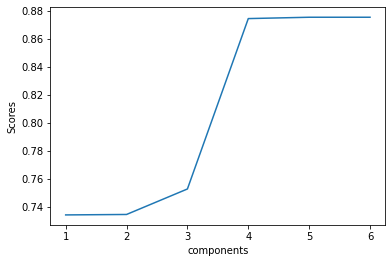

In [ ]:
num_comps = np.arange(1,7)

scores = pcaSVM(num_comps,Xtrain=X_train,Xtest=X_test,ytrain=y_train,ytest=y_test)

plt.plot(num_comps,scores)
plt.xlabel("components")
plt.ylabel("Scores")

Text(0, 0.5, 'Scores')

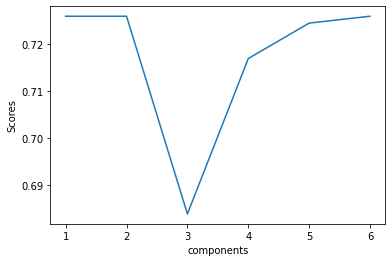

In [ ]:
num_comps = np.arange(1,7)

scores = pcaSVM(num_comps,Xtrain=X_train,Xtest=X_testfile,ytrain=y_train,ytest=y_testfile)

plt.plot(num_comps,scores)
plt.xlabel("components")
plt.ylabel("Scores")

Text(69.0, 0.5, 'Truth')

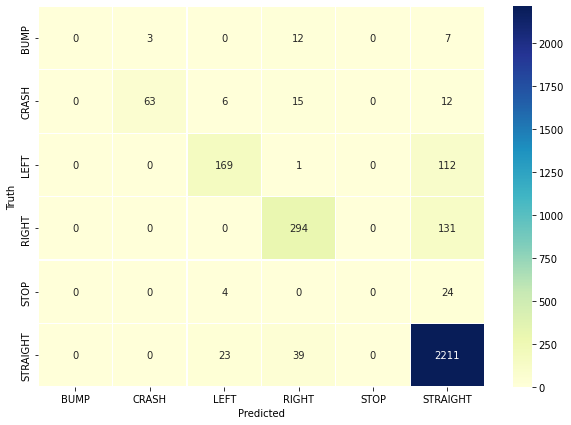

In [ ]:
y_predicted = model.predict(X_test)
plt.figure(figsize=(10, 7))
class_labels = [ 'BUMP', 'CRASH', 'LEFT','RIGHT',  'STOP', 'STRAIGHT']
cm = confusion_matrix(y_test, y_predicted)
sn.heatmap(cm,  xticklabels = class_labels, yticklabels = class_labels, annot = True, linewidths = 0.1, fmt='d', cmap = 'YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('Truth')
